In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and exploring!

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
train_df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
test_df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [5]:
sub_df = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')
sub_df.head()

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [7]:
print(f'Shape of TRAIN dataset: {train_df.shape}')
print(f'Shape of TEST dataset: {test_df.shape}')

Shape of TRAIN dataset: (14838, 38)
Shape of TEST dataset: (9893, 32)


In [8]:
# NaN Values

train_na_vals = train_df.isna().sum()
test_na_vals = test_df.isna().sum()

print(f'TRAIN NaN values:\n{train_na_vals.loc[train_na_vals > 0]}\n')
print(f'TEST NaN values:\n{test_na_vals.loc[test_na_vals > 0]}')

TRAIN NaN values:
Series([], dtype: int64)

TEST NaN values:
Series([], dtype: int64)


In [9]:
# duplicates
train_df.duplicated().sum()

0

### Target values

Let's explore target values a bit.

In [10]:
targets = ['EC1',
           'EC2', 
           'EC3', 
           'EC4', 
           'EC5', 
           'EC6']

In [11]:
for target in targets:
    print(f'{target}: {train_df[target].unique()}')

EC1: [1 0]
EC2: [1 0]
EC3: [0 1]
EC4: [0 1]
EC5: [0 1]
EC6: [0 1]


<Axes: xlabel='EC2', ylabel='count'>

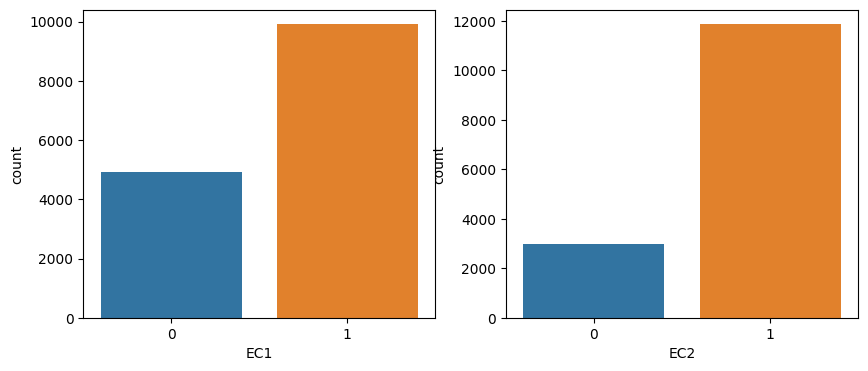

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x = train_df['EC1'])

plt.subplot(1, 2, 2)
sns.countplot(x = train_df['EC2'])

### Features

In [13]:
maybe_categorical_features = ['NumHeteroatoms', 'fr_COO', 'fr_COO2']
train_df[maybe_categorical_features].nunique()

NumHeteroatoms    40
fr_COO             8
fr_COO2            8
dtype: int64

In [14]:
test_df[maybe_categorical_features].nunique()

NumHeteroatoms    40
fr_COO             7
fr_COO2            7
dtype: int64

In [15]:
categorical_features = maybe_categorical_features.copy()

numerical_features = [feat for feat in train_df.columns if feat not in targets and feat not in categorical_features]
numerical_features.remove('id')

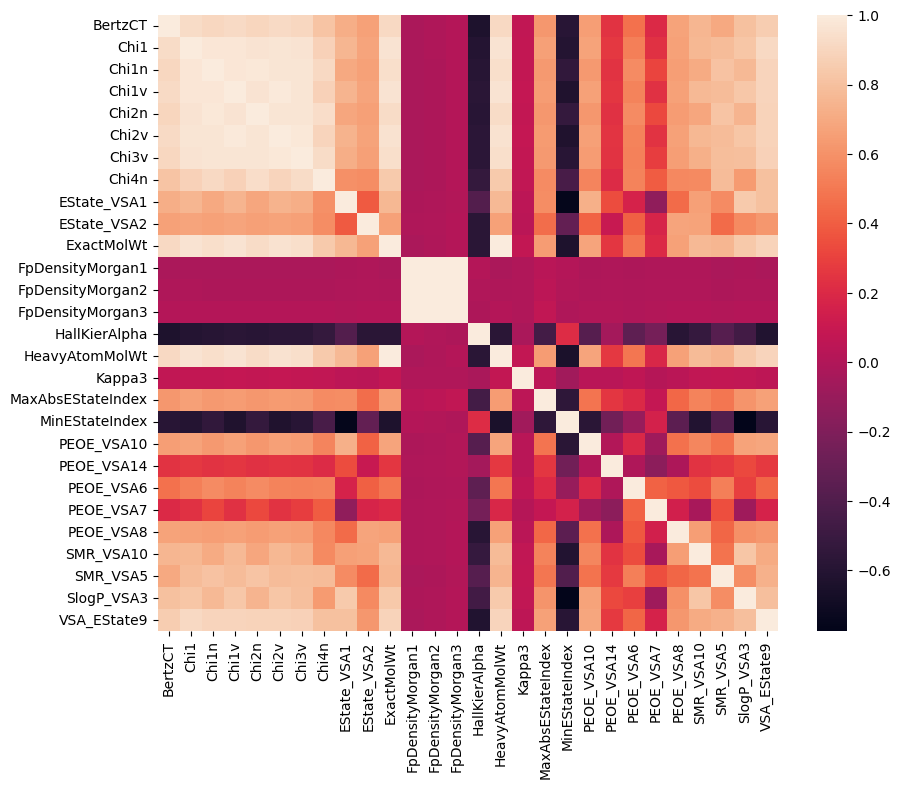

In [17]:
# df.corr(method = 'pearson')
# Pearson coefficient doesn't work correctly in case of outliers presence!
# let's check corr values on initial dataset without any changes 

plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numerical_features].corr());

<Axes: xlabel='Chi1', ylabel='BertzCT'>

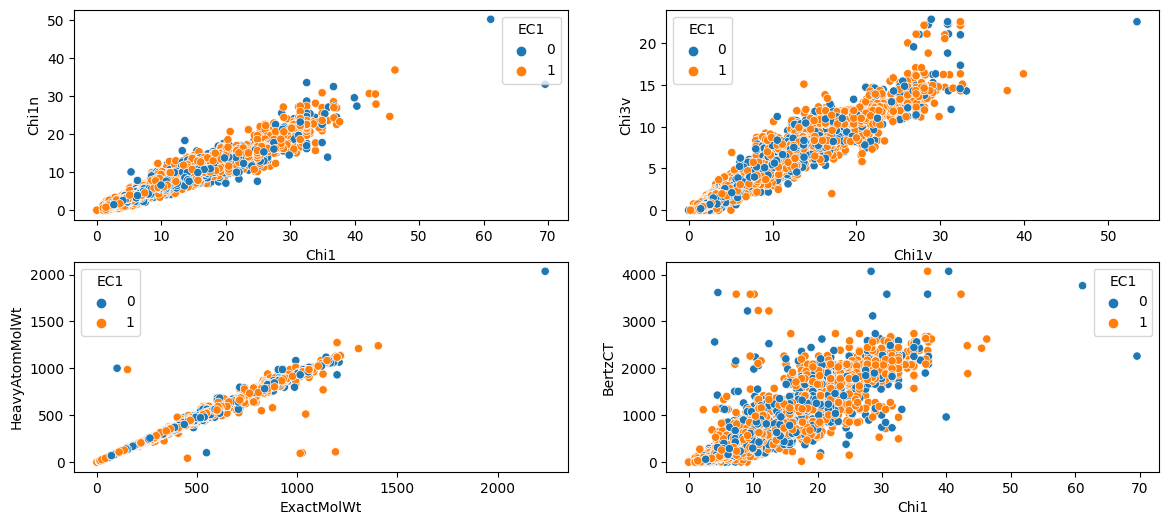

In [18]:
# couple scatter plots to be sure that relationshipss are linear
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(data = train_df,
                x = 'Chi1',
                y = 'Chi1n',
                hue = 'EC1')

plt.subplot(2, 2, 2)
sns.scatterplot(data = train_df,
                x = 'Chi1v',
                y = 'Chi3v',
                hue = 'EC1')

plt.subplot(2, 2, 3)
sns.scatterplot(data = train_df,
                x = 'ExactMolWt',
                y = 'HeavyAtomMolWt',
                hue = 'EC1')

plt.subplot(2, 2, 4)
sns.scatterplot(data = train_df,
                x = 'Chi1',
                y = 'BertzCT',
                hue = 'EC1')

In [19]:
# let's remove outliers

from sklearn.ensemble import IsolationForest
outliers_pred = IsolationForest(random_state = 42).fit_predict(train_df.loc[:, ~train_df.columns.isin(targets)])

# 1 for inliers, -1 for outliers.
train_df_without_outliers = train_df.loc[outliers_pred != -1, :]
print(f'{sum(outliers_pred == -1)/len(outliers_pred) * 100:.2f}% of data are outliers!')

14.64% of data are outliers!


<Axes: >

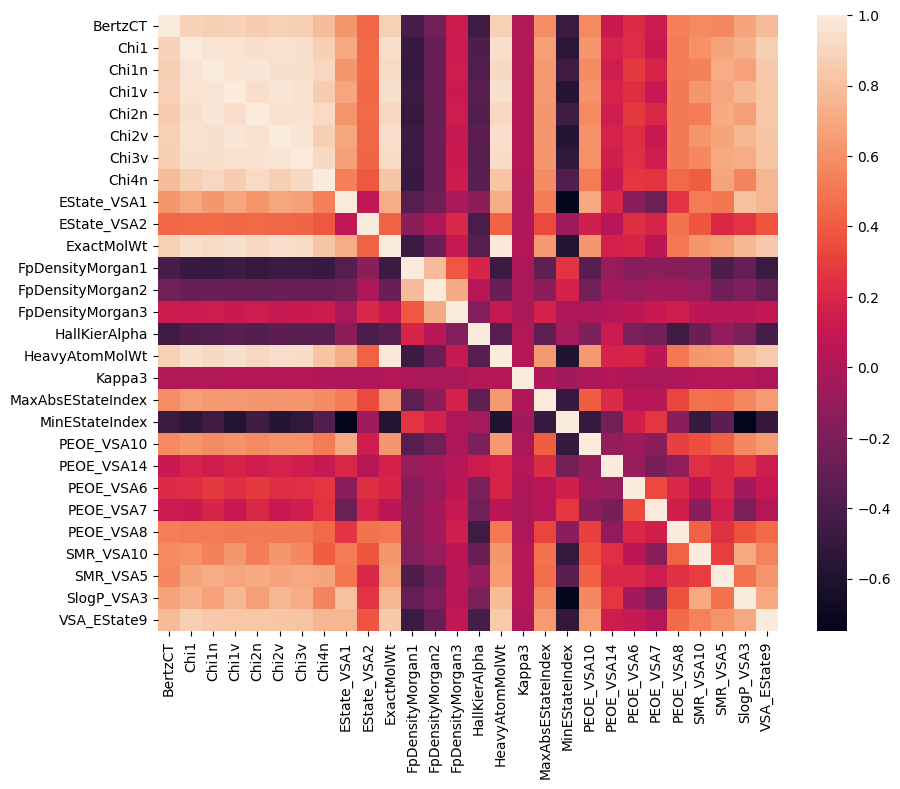

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df_without_outliers[numerical_features].corr())

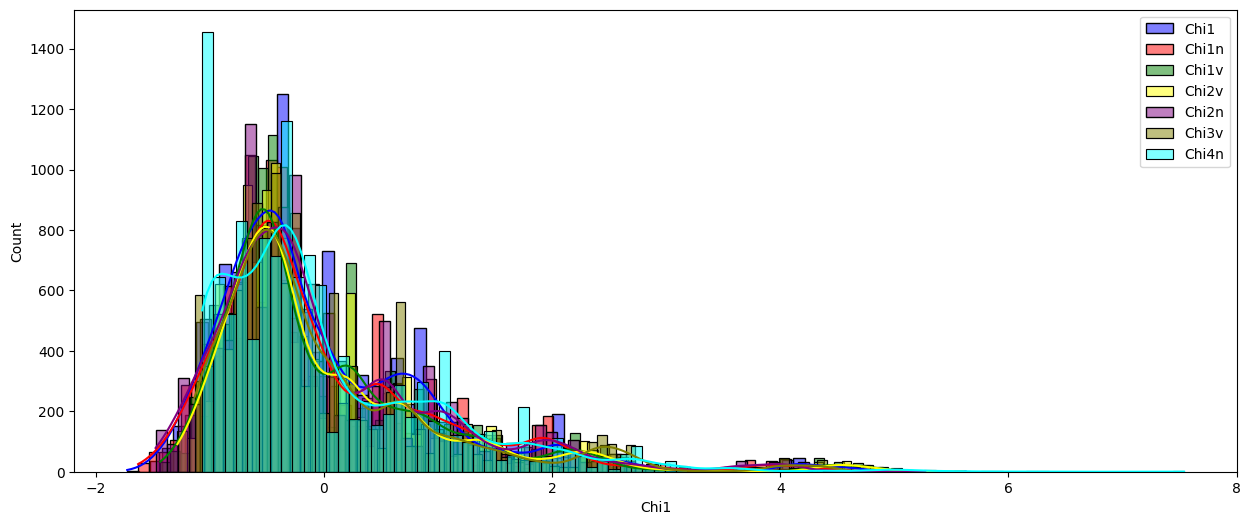

In [21]:
# compare distrubutions of normilazed features
def normilized_feature(feat_name):
    return (train_df_without_outliers[feat_name] - train_df_without_outliers[feat_name].mean())/train_df_without_outliers[feat_name].std()


plt.figure(figsize=(15, 6))
sns.histplot(normilized_feature('Chi1'), kde = True, fill = True, color = 'blue', label = 'Chi1')
sns.histplot(normilized_feature('Chi1n'), kde = True, fill = True, color = 'red', label = 'Chi1n')
sns.histplot(normilized_feature('Chi1v'), kde = True, fill = True, color = 'green', label = 'Chi1v')
sns.histplot(normilized_feature('Chi2v'), kde = True, fill = True, color = 'yellow', label = 'Chi2v')
sns.histplot(normilized_feature('Chi2n'), kde = True, fill = True, color = 'purple', label = 'Chi2n')
sns.histplot(normilized_feature('Chi3v'), kde = True, fill = True, color = 'olive', label = 'Chi3v')
sns.histplot(normilized_feature('Chi4n'), kde = True, fill = True, color = 'cyan', label = 'Chi4n')
plt.legend()

<Axes: xlabel='Chi4n', ylabel='Chi1n'>

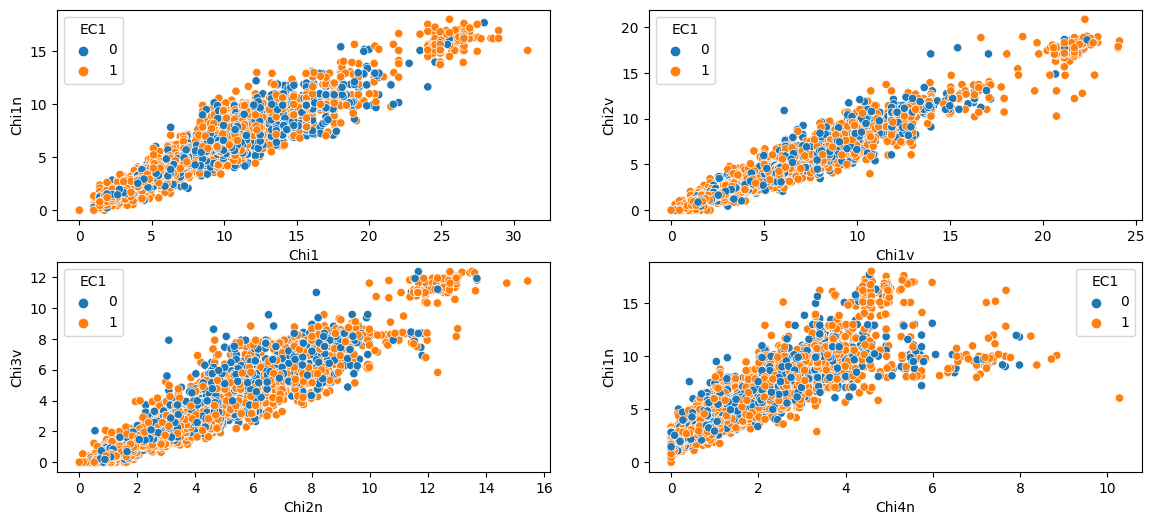

In [22]:
# couple scatter plots to be sure that relationshipss are linear
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi1',
                y = 'Chi1n',
                hue = 'EC1')

plt.subplot(2, 2, 2)
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi1v',
                y = 'Chi2v',
                hue = 'EC1')

plt.subplot(2, 2, 3)
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi2n',
                y = 'Chi3v',
                hue = 'EC1')

plt.subplot(2, 2, 4)
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi4n',
                y = 'Chi1n',
                hue = 'EC1')

In [23]:
features_to_exclude = ['Chi1n', 'Chi1v', 'Chi2v', 'Chi2n', 'Chi3v', 'Chi4n']

<Axes: xlabel='Chi1', ylabel='BertzCT'>

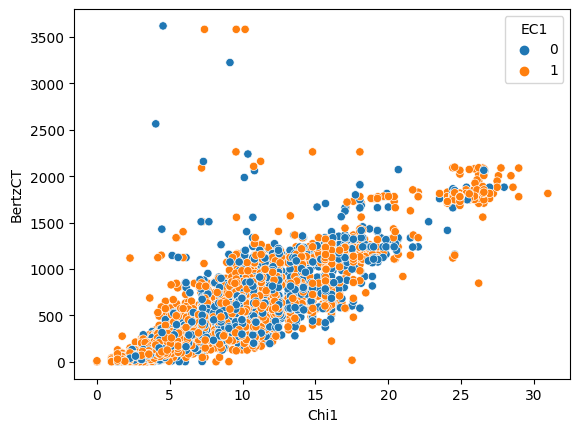

In [24]:
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi1',
                y = 'BertzCT',
                hue = 'EC1')

In [ ]:
#features_to_exclude.append('BertzCT')

<Axes: xlabel='ExactMolWt', ylabel='HeavyAtomMolWt'>

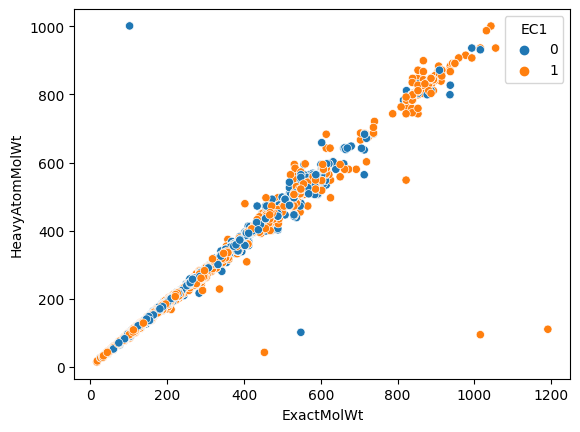

In [25]:
sns.scatterplot(data = train_df_without_outliers,
                x = 'ExactMolWt',
                y = 'HeavyAtomMolWt',
                hue = 'EC1')

In [26]:
features_to_exclude.append('ExactMolWt')

<Axes: xlabel='Chi1', ylabel='HeavyAtomMolWt'>

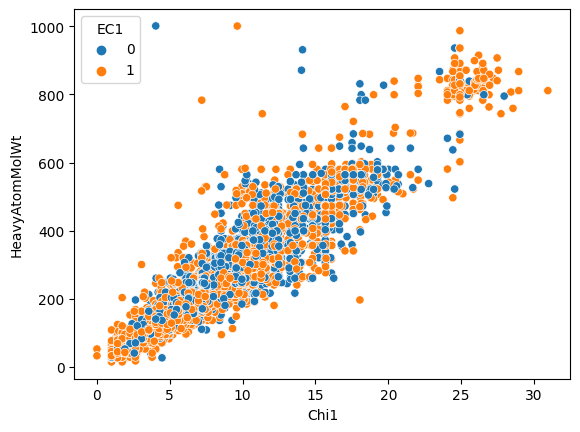

In [27]:
sns.scatterplot(data = train_df_without_outliers,
                x = 'Chi1',
                y = 'HeavyAtomMolWt',
                hue = 'EC1')

In [28]:
features_to_exclude.append('Chi1')

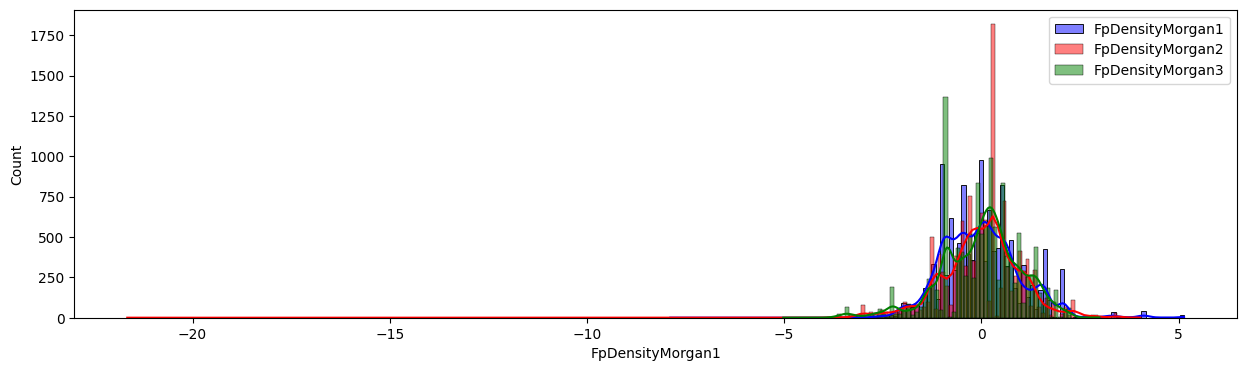

In [29]:
plt.figure(figsize=(15, 4))

sns.histplot(normilized_feature('FpDensityMorgan1'), kde = True, fill = True, color = 'blue', label = 'FpDensityMorgan1')
sns.histplot(normilized_feature('FpDensityMorgan2'), kde = True, fill = True, color = 'red', label = 'FpDensityMorgan2')
sns.histplot(normilized_feature('FpDensityMorgan3'), kde = True, fill = True, color = 'green', label = 'FpDensityMorgan3')
plt.legend()

<Axes: xlabel='FpDensityMorgan1', ylabel='FpDensityMorgan3'>

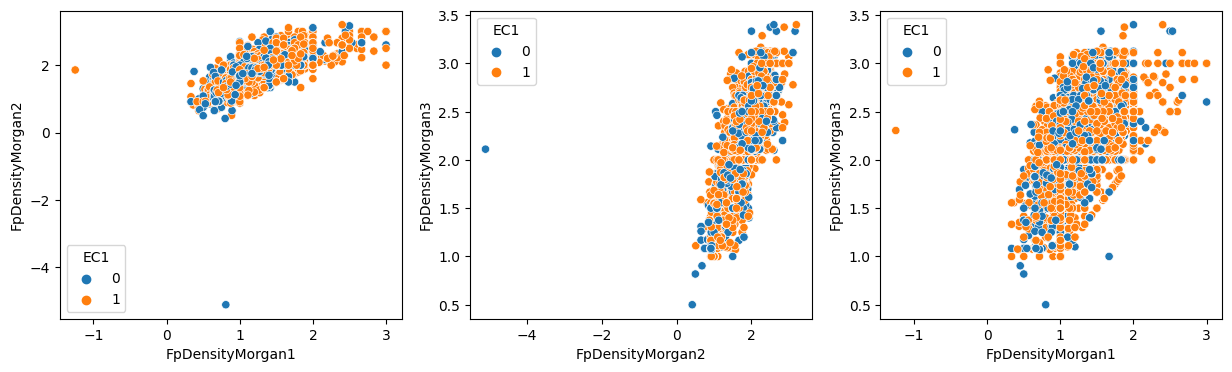

In [30]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data = train_df_without_outliers,
                x = 'FpDensityMorgan1',
                y = 'FpDensityMorgan2',
                hue = 'EC1')

plt.subplot(1, 3, 2)
sns.scatterplot(data = train_df_without_outliers,
                x = 'FpDensityMorgan2',
                y = 'FpDensityMorgan3',
                hue = 'EC1')

plt.subplot(1, 3, 3)
sns.scatterplot(data = train_df_without_outliers,
                x = 'FpDensityMorgan1',
                y = 'FpDensityMorgan3',
                hue = 'EC1')

In [31]:
features_to_exclude.append('FpDensityMorgan2')

<Axes: xlabel='BertzCT', ylabel='HeavyAtomMolWt'>

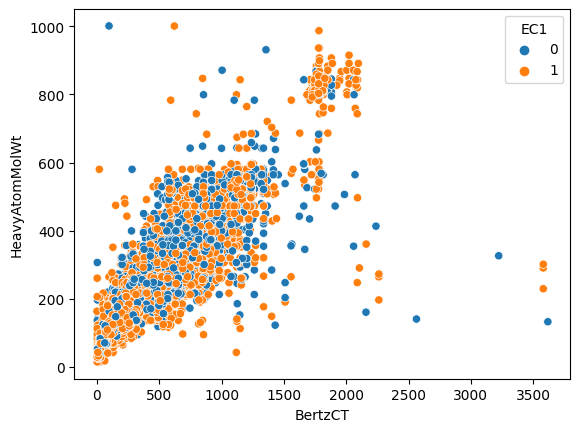

In [32]:
sns.scatterplot(data = train_df_without_outliers,
                x = 'BertzCT',
                y = 'HeavyAtomMolWt',
                hue = 'EC1')

In [33]:
features_to_exclude.append('HeavyAtomMolWt')

<Axes: xlabel='MinEStateIndex', ylabel='PEOE_VSA10'>

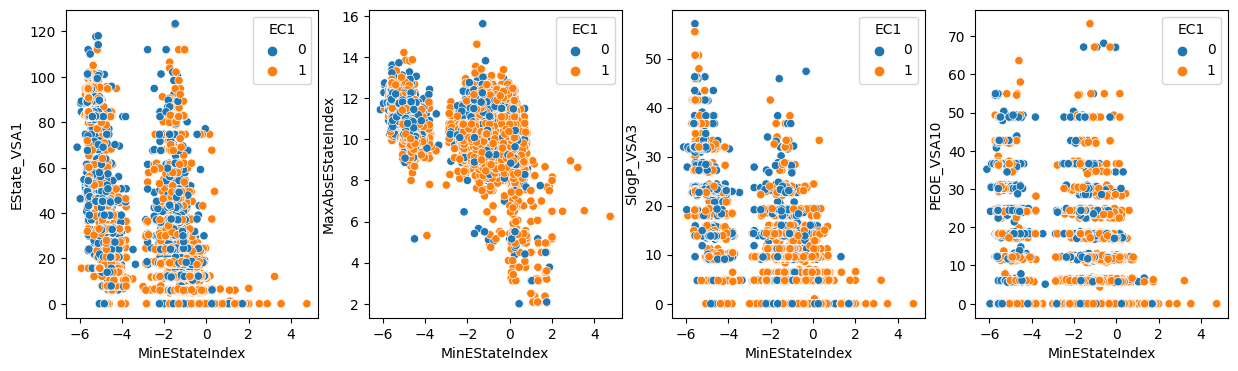

In [34]:
# lets take a closer look at 'MinEStateIndex' feature 

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(data = train_df_without_outliers,
                x = 'MinEStateIndex',
                y = 'EState_VSA1',
                hue = 'EC1')

plt.subplot(1, 4, 2)
sns.scatterplot(data = train_df_without_outliers,
                x = 'MinEStateIndex',
                y = 'MaxAbsEStateIndex',
                hue = 'EC1')

plt.subplot(1, 4, 3)
sns.scatterplot(data = train_df_without_outliers,
                x = 'MinEStateIndex',
                y = 'SlogP_VSA3',
                hue = 'EC1')

plt.subplot(1, 4, 4)
sns.scatterplot(data = train_df_without_outliers,
                x = 'MinEStateIndex',
                y = 'PEOE_VSA10',
                hue = 'EC1')

In [35]:
features_to_exclude.append('MinEStateIndex')

In [36]:
numerical_features = [feat for feat in numerical_features if feat not in features_to_exclude]

In [37]:
train_df_without_outliers.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

<Axes: >

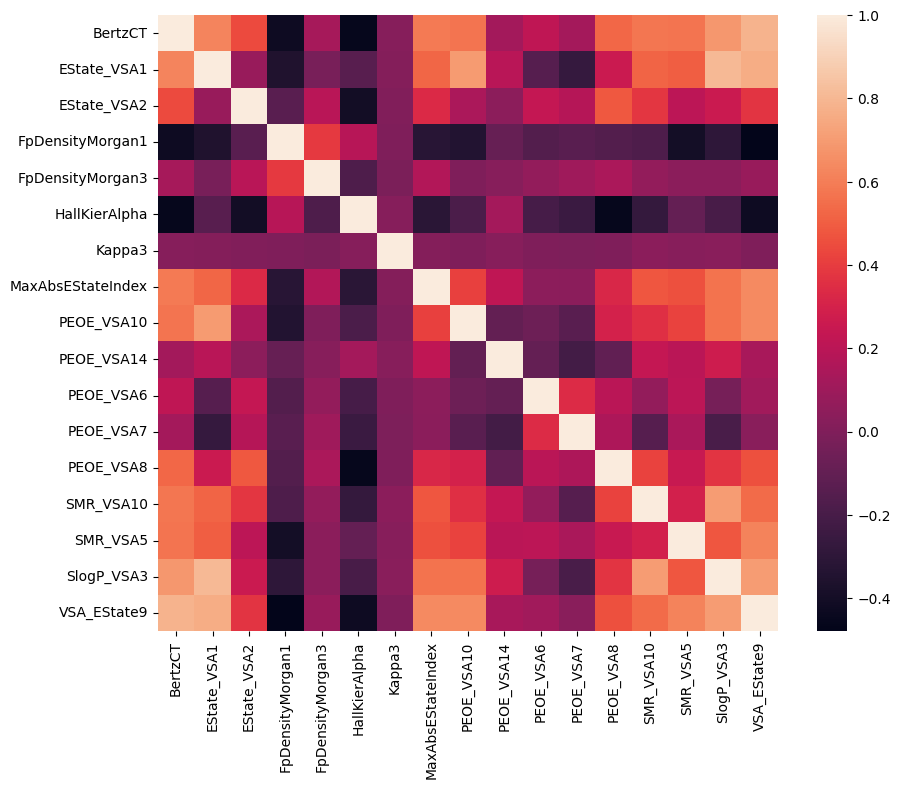

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df_without_outliers[numerical_features].corr())

In [39]:
len(train_df_without_outliers.columns)

38

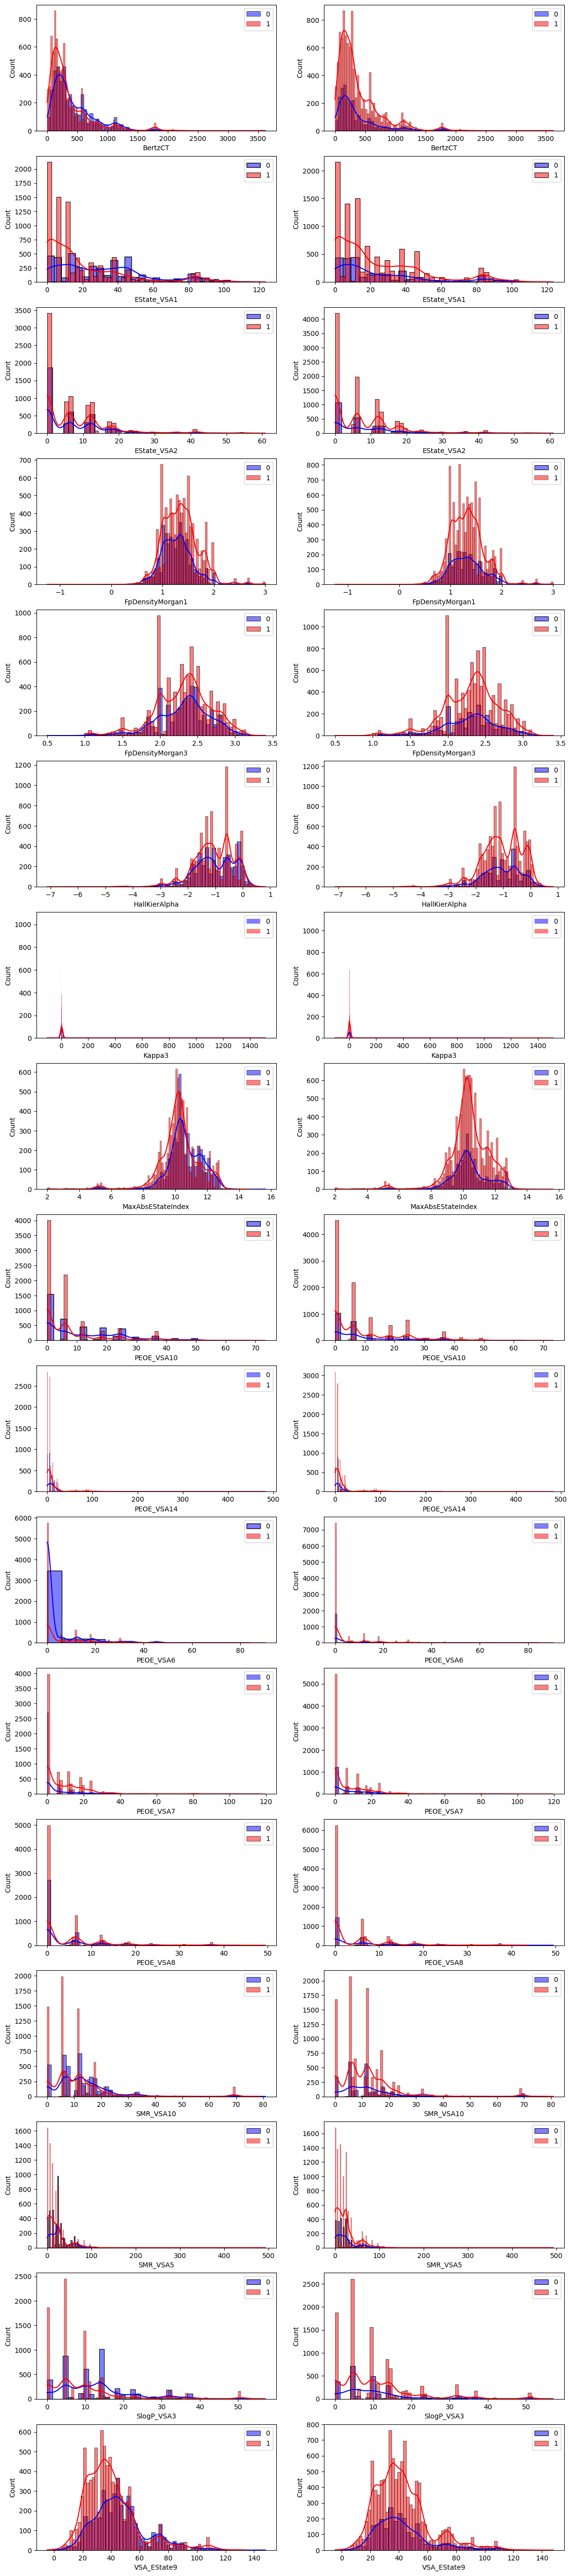

In [40]:
plt.figure(figsize=(14, 4 * len(numerical_features)))

for i, col in enumerate(numerical_features, start = 0):
    plt.subplot(len(numerical_features), 2, i * 2 + 1)
    sns.histplot(train_df_without_outliers.loc[train_df_without_outliers['EC1'] == 0, col], kde = True, color = 'blue', label = '0')
    sns.histplot(train_df_without_outliers.loc[train_df_without_outliers['EC1'] == 1, col], kde = True, color = 'red', label = '1')
    plt.legend()
    
    plt.subplot(len(numerical_features), 2, i * 2 + 2)
    sns.histplot(train_df_without_outliers.loc[train_df_without_outliers['EC2'] == 0, col], kde = True, color = 'blue', label = '0')
    sns.histplot(train_df_without_outliers.loc[train_df_without_outliers['EC2'] == 1, col], kde = True, color = 'red', label = '1')
    plt.legend()

## Let's categorize features that can be categorized!

In [41]:
# let's take a closer look at the following features:
can_be_categorical = ['EState_VSA1', 'EState_VSA2', 
                      'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 
                      'SMR_VSA5', 'SlogP_VSA3']

In [42]:
len(can_be_categorical)

9

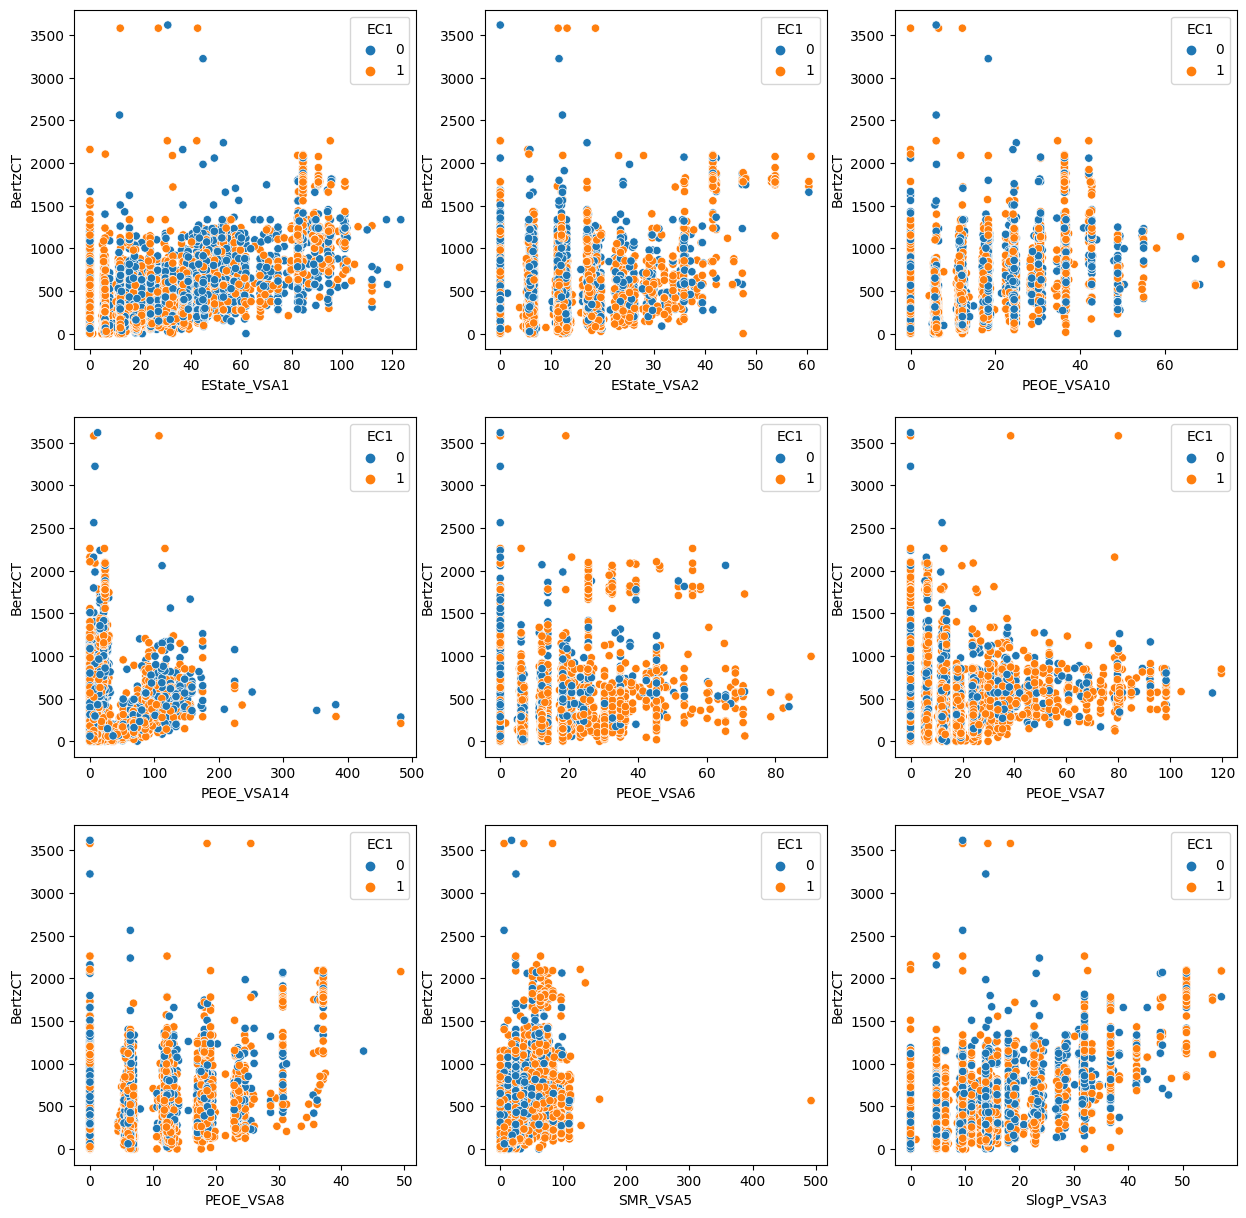

In [43]:
plt.figure(figsize=(15, 15))

# i'm gonna take 'BertzCT' numerical feature
# and build scatter plot for this feature and every can-be-categorical features

for i, feat in enumerate(can_be_categorical, start = 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data = train_df_without_outliers,
                    x = feat,
                    y = 'BertzCT',
                    hue = 'EC1')

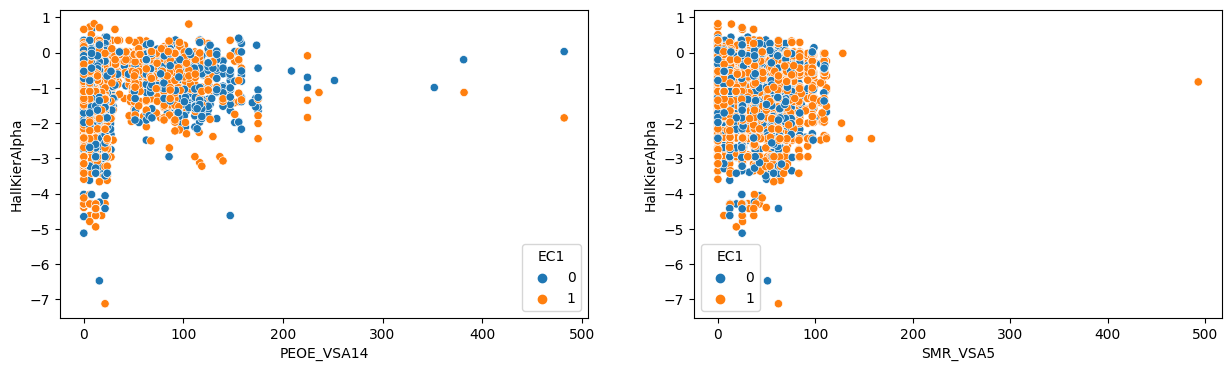

In [44]:
# check 'PEOE_VSA14', 'SMR_VSA5' features using another numerical feature - 'HallKierAlpha'

plt.figure(figsize=(15, 4))
for i, feat in enumerate(['PEOE_VSA14', 'SMR_VSA5'], start = 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data = train_df_without_outliers,
                    x = feat,
                    y = 'HallKierAlpha',
                    hue = 'EC1')

In [45]:
# all these features may be converted into categorical features
# let's try to do this


            # feature name -- n_bins
feat_vs_bins = (('EState_VSA1', 4),
                ('EState_VSA2', 6),
                ('PEOE_VSA10', 14),
                ('PEOE_VSA14', 6),
                ('PEOE_VSA6', 6),
                ('PEOE_VSA7', 13),
                ('PEOE_VSA8', 8),
                ('SMR_VSA5', 6),
                ('SlogP_VSA3', 10))

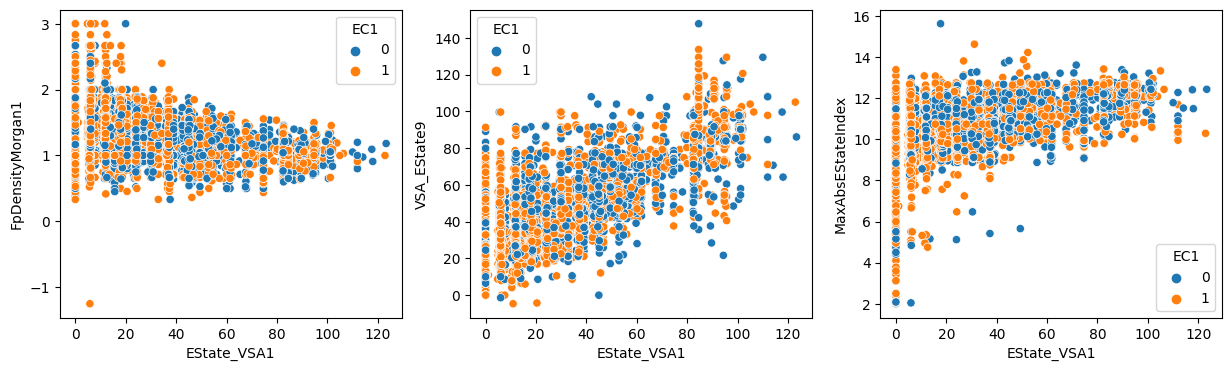

In [46]:
# example of plots that help to select 'n_bins' number 

num_features_example = ['FpDensityMorgan1', 'VSA_EState9', 'MaxAbsEStateIndex']

plt.figure(figsize=(15, 4))
for i, num_feature in enumerate(num_features_example, start = 1):
    plt.subplot(1, len(num_features_example), i)
    sns.scatterplot(data = train_df_without_outliers,
                    x = feat_vs_bins[0][0],
                    y = num_feature,
                    hue = 'EC1')

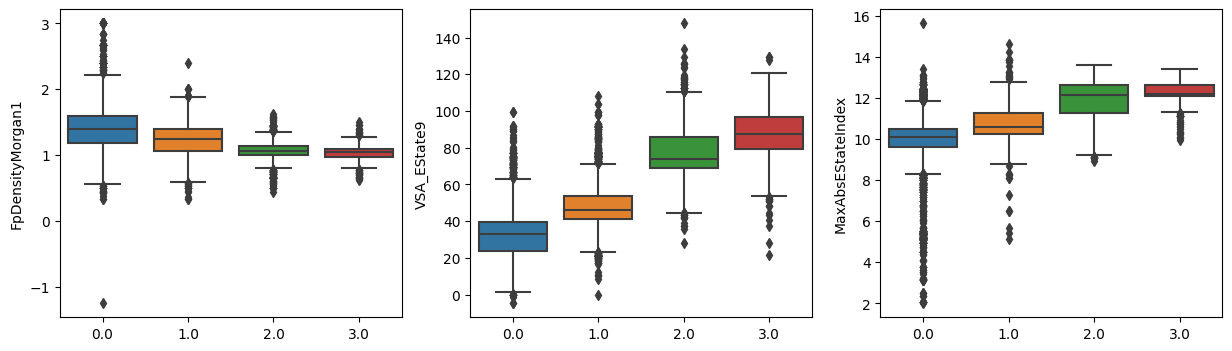

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

kbins_dis = KBinsDiscretizer(n_bins = feat_vs_bins[0][1],
                             encode = 'ordinal',
                             strategy = 'kmeans',
                             random_state = 42)
transform = kbins_dis.fit_transform(train_df_without_outliers[[feat_vs_bins[0][0]]])

plt.figure(figsize=(15, 4))
for i, num_feature in enumerate(num_features_example, start = 1):
    plt.subplot(1, len(num_features_example), i)
    sns.boxplot(data = train_df_without_outliers,
                x = np.squeeze(transform),
                y = num_feature)

In [48]:
from sklearn.preprocessing import KBinsDiscretizer

for feat, n_bins in feat_vs_bins:
    kbins_dis = KBinsDiscretizer(n_bins = n_bins,
                                 encode = 'ordinal',
                                 strategy = 'kmeans',
                                 random_state = 42)
    kbins_dis.fit(train_df_without_outliers[[feat]])
    train_df_without_outliers.loc[:, feat] = kbins_dis.transform(train_df_without_outliers[[feat]])
    test_df.loc[:, feat] = kbins_dis.transform(test_df[[feat]])

In [49]:
numerical_features = [feat for feat in numerical_features if feat not in can_be_categorical]
categorical_features.extend(can_be_categorical)

In [50]:
train_df_without_outliers[can_be_categorical].head()

,EState_VSA1,EState_VSA2,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA5,SlogP_VSA3
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,3.0
3,3.0,0.0,8.0,0.0,0.0,0.0,1.0,2.0,5.0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0


## PCA

In [51]:
from sklearn.decomposition import PCA

chi_features_to_exclude = ['Chi1', 'Chi1n', 'Chi1v', 'Chi2v', 'Chi2n', 'Chi3v', 'Chi4n']
chi_feat_new = ['Chi_PCA_1', 'Chi_PCA_2']

pca = PCA(n_components = 2, random_state = 42)
train_df_without_outliers.loc[:, chi_feat_new] = pca.fit_transform(train_df_without_outliers.loc[:, chi_features_to_exclude])
test_df.loc[:, chi_feat_new] = pca.transform(test_df.loc[:, chi_features_to_exclude])

train_df_without_outliers = train_df_without_outliers.drop(columns = chi_features_to_exclude)
test_df = test_df.drop(columns = chi_features_to_exclude)

In [52]:
numerical_features = [feat for feat in numerical_features if feat not in chi_features_to_exclude]
numerical_features.extend(chi_feat_new)

## Put it all together: normalization + OHE

In [53]:
y = train_df_without_outliers[targets]
train_df_without_outliers = train_df_without_outliers.drop(columns = targets)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df_without_outliers, 
                                                  y.iloc[:, :2],
                                                  test_size = 0.2,
                                                  random_state = 42)

In [59]:
y_train

,EC1,EC2
12699,1,0
11139,1,1
9826,1,1
1606,0,1
1725,1,1
...,...,...
14015,0,1
6107,1,1
6335,1,1
1047,0,0


In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
num_feat_train_matrix = ss.fit_transform(X_train[numerical_features])
num_feat_val_matrix = ss.transform(X_val[numerical_features])

num_feat_test_matrix = ss.transform(test_df[numerical_features])

In [56]:
# OHE
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output = False)
cat_feat_train_matrix = ohe.fit_transform(X_train[categorical_features])
cat_feat_val_matrix = ohe.transform(X_val[categorical_features])

cat_feat_test_matrix = ohe.transform(test_df[categorical_features])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
X_train_final = np.hstack((num_feat_train_matrix, cat_feat_train_matrix))
X_val_final = np.hstack((num_feat_val_matrix, cat_feat_val_matrix))
X_test_final = np.hstack((num_feat_test_matrix, cat_feat_test_matrix))
print(X_train_final.shape, X_val_final.shape, X_test_final.shape)

(10132, 114) (2533, 114) (9893, 114)


## Start with simple Logistic Regression

In [58]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(random_state = 42,
                      max_iter = 1_000)

clf.fit(X_train_final, y_train)

RidgeClassifier(max_iter=1000, random_state=42)

In [60]:
res_df = pd.DataFrame(columns = ['model', 'train score', 'val score'])
res_df.loc[len(res_df)] = ['LR', clf.score(X_train_final, y_train), clf.score(X_val_final, y_val)]
res_df

,model,train score,val score
0,LR,0.563166,0.536518


## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 10)
knn_clf.fit(X_train_final, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
res_df.loc[len(res_df)] = ['KNN', knn_clf.score(X_train_final, y_train), knn_clf.score(X_val_final, y_val)]
res_df

,model,train score,val score
0,LR,0.563166,0.536518
1,KNN,0.592677,0.516779


## Multioutput Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf_clf = MultiOutputClassifier(RandomForestClassifier(max_depth = 8,
                                                      n_estimators = 150,
                                                      random_state = 42,
                                                      max_features = 0.7))

rf_clf.fit(X_train_final, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=8,
                                                       max_features=0.7,
                                                       n_estimators=150,
                                                       random_state=42))

In [64]:
res_df.loc[len(res_df)] = ['RF', rf_clf.score(X_train_final, y_train), rf_clf.score(X_val_final, y_val)]

In [65]:
res_df

,model,train score,val score
0,LR,0.563166,0.536518
1,KNN,0.592677,0.516779
2,RF,0.625740,0.546782


## Multioutput LightGBM

In [66]:
import lightgbm as lgbm

lgbm_clf = MultiOutputClassifier(lgbm.LGBMClassifier(max_depth = 3,
                                                     random_state = 42,
                                                     n_estimators = 120,
                                                     learning_rate = 0.01,
                                                     colsample_bytree = 0.4,
                                                     is_unbalance = True)) 

lgbm_clf.fit(X_train_final, y_train)

MultiOutputClassifier(estimator=LGBMClassifier(colsample_bytree=0.4,
                                               is_unbalance=True,
                                               learning_rate=0.01, max_depth=3,
                                               n_estimators=120,
                                               random_state=42))

In [67]:
res_df.loc[len(res_df)] = ['LGBM', lgbm_clf.score(X_train_final, y_train), lgbm_clf.score(X_val_final, y_val)]
res_df

,model,train score,val score
0,LR,0.563166,0.536518
1,KNN,0.592677,0.516779
2,RF,0.625740,0.546782
3,LGBM,0.561883,0.530991


## NN

Epoch 1/70, Train Loss: 1.3023, Val Loss: 1.1867, Train Precision: 0.7367, Val Precision: 0.7304
Epoch 2/70, Train Loss: 1.1391, Val Loss: 1.1297, Train Precision: 0.7361, Val Precision: 0.7304
Epoch 3/70, Train Loss: 1.1146, Val Loss: 1.1185, Train Precision: 0.7360, Val Precision: 0.7304
Epoch 4/70, Train Loss: 1.1055, Val Loss: 1.1112, Train Precision: 0.7365, Val Precision: 0.7304
Epoch 5/70, Train Loss: 1.0972, Val Loss: 1.1064, Train Precision: 0.7410, Val Precision: 0.7319
Epoch 6/70, Train Loss: 1.0919, Val Loss: 1.1028, Train Precision: 0.7478, Val Precision: 0.7412
Epoch 7/70, Train Loss: 1.0875, Val Loss: 1.1009, Train Precision: 0.7522, Val Precision: 0.7475
Epoch 8/70, Train Loss: 1.0853, Val Loss: 1.0991, Train Precision: 0.7559, Val Precision: 0.7517
Epoch 9/70, Train Loss: 1.0831, Val Loss: 1.0982, Train Precision: 0.7591, Val Precision: 0.7533
Epoch 10/70, Train Loss: 1.0810, Val Loss: 1.0970, Train Precision: 0.7604, Val Precision: 0.7549
Epoch 11/70, Train Loss: 1.07

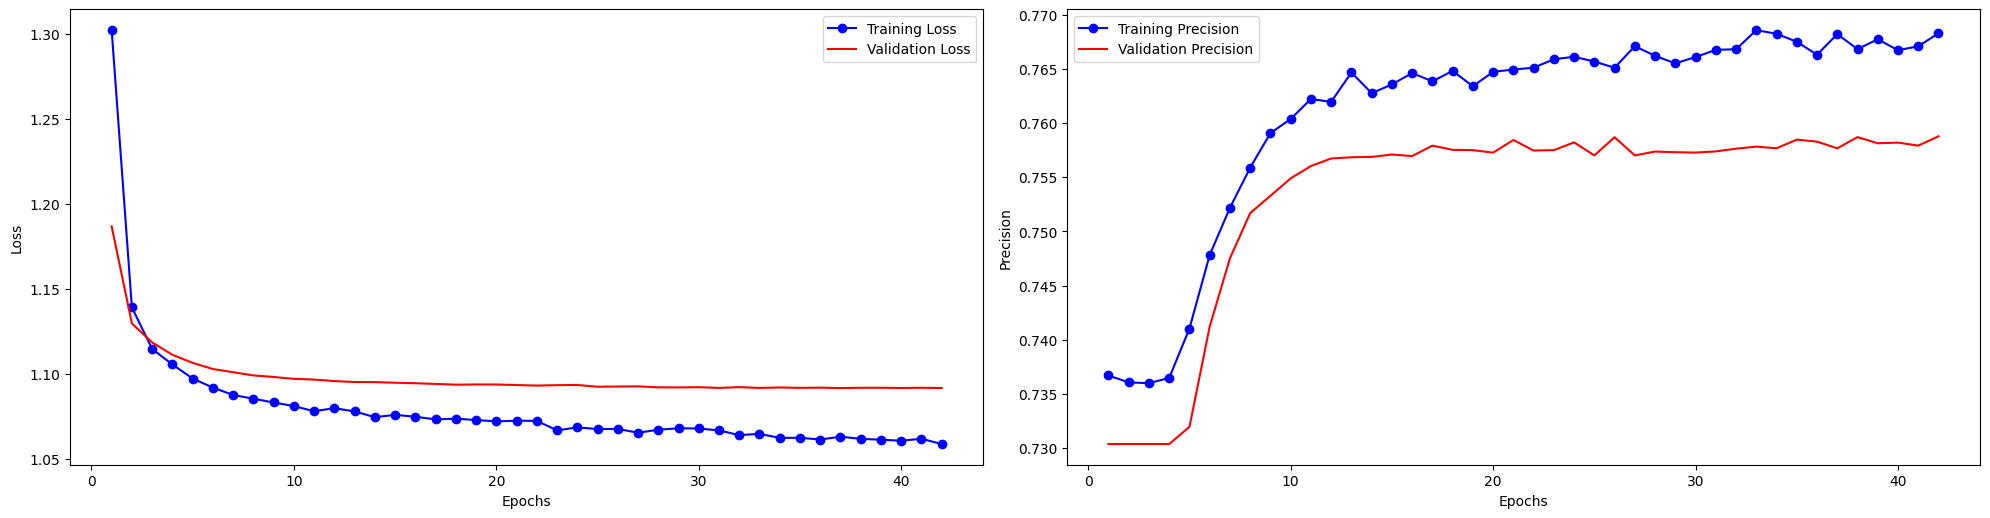

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt

# Define the model
class MultiOutputNN(nn.Module):
    def __init__(self, input_dim, output_dims):
        super(MultiOutputNN, self).__init__()
        self.shared_layer = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.task_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(32, 8),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(8, 1),
                nn.Sigmoid()
            ) for _ in output_dims
        ])
    
    def forward(self, x):
        shared_output = self.shared_layer(x)
        outputs = [task(shared_output).squeeze() for task in self.task_layers]
        return outputs

# Initialize the model
input_dim = X_train_final.shape[1]
output_dims = [1] * y_train.shape[1]  # Binary outputs
model = MultiOutputNN(input_dim, output_dims)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Create DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train_final, dtype=torch.float32),
                               *[torch.tensor(y_train.iloc[:, i].values, dtype=torch.float32) for i in range(y_train.shape[1])])
val_dataset = TensorDataset(torch.tensor(X_val_final, dtype=torch.float32),
                             *[torch.tensor(y_val.iloc[:, i].values, dtype=torch.float32) for i in range(y_val.shape[1])])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training and validation loop
best_model_state = None
best_val_loss = float('inf')
early_stopping_patience = 5
no_improve_epochs = 0

history = {
    "train_loss": [],
    "val_loss": [],
    "precision_train": [],
    "precision_val": []
}

for epoch in range(70):
    model.train()
    train_loss = 0.0
    train_preds = []
    train_targets = []
    for batch in train_loader:
        X_batch, *y_batch = batch
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = sum(criterion(output, y) for output, y in zip(outputs, y_batch))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Collect predictions for precision
        train_preds.append(torch.stack(outputs, dim=1).detach().cpu().numpy())
        train_targets.append(torch.stack(y_batch, dim=1).cpu().numpy())
    
    train_loss /= len(train_loader)
    train_preds = np.vstack(train_preds)  # Stack along batch dimension
    train_targets = np.vstack(train_targets)
    train_precision = precision_score(train_targets, (train_preds > 0.5), average='macro')

    model.eval()
    val_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch in val_loader:
            X_batch, *y_batch = batch
            outputs = model(X_batch)
            loss = sum(criterion(output, y) for output, y in zip(outputs, y_batch))
            val_loss += loss.item()

            # Collect predictions for precision
            val_preds.append(torch.stack(outputs, dim=1).cpu().numpy())
            val_targets.append(torch.stack(y_batch, dim=1).cpu().numpy())
    
    val_loss /= len(val_loader)
    val_preds = np.vstack(val_preds)  # Stack along batch dimension
    val_targets = np.vstack(val_targets)
    val_precision = precision_score(val_targets, (val_preds > 0.5), average='macro')

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["precision_train"].append(train_precision)
    history["precision_val"].append(val_precision)

    print(f"Epoch {epoch+1}/70, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Precision: {train_precision:.4f}, Val Precision: {val_precision:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        if no_improve_epochs >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load the best model weights
model.load_state_dict(best_model_state)

# Plot the results
epochs = range(1, len(history["train_loss"]) + 1)

plt.figure(figsize=(20, 10))

# Loss plot
plt.subplot(2, 2, 1)
plt.plot(epochs, history["train_loss"], 'bo-', label='Training Loss')
plt.plot(epochs, history["val_loss"], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(epochs, history["precision_train"], 'bo-', label='Training Precision')
plt.plot(epochs, history["precision_val"], 'r-', label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0.0
    preds = []
    targets = []
    with torch.no_grad():
        for batch in data_loader:
            X_batch, *y_batch = batch
            outputs = model(X_batch)
            loss = sum(criterion(output, y) for output, y in zip(outputs, y_batch))
            total_loss += loss.item()

            preds.append(torch.stack(outputs, dim=1).cpu().numpy())
            targets.append(torch.stack(y_batch, dim=1).cpu().numpy())
    
    total_loss /= len(data_loader)
    preds = np.vstack(preds)  # Combine all batches
    targets = np.vstack(targets)
    precision = precision_score(targets, (preds > 0.5), average='macro')

    return {"loss": total_loss, "precision": precision}

# Evaluate on training and validation data
train_results = evaluate_model(model, train_loader, criterion)
val_results = evaluate_model(model, val_loader, criterion)

# Create result DataFrame
res_df.loc[len(res_df)] = [
    "NN",
    train_results["precision"],
    val_results["precision"]
]

print(res_df)

  model  train score  val score
0    LR     0.563166   0.536518
1   KNN     0.592677   0.516779
2    RF     0.625740   0.546782
3  LGBM     0.561883   0.530991
4    NN     0.776033   0.758796


## Making a prediction + submission

In [76]:
def submit_pred(y1, y2, csv_name = 'submission.csv'):
    sub = test_df['id'].to_frame()
    sub['EC1'] = y1
    sub['EC2'] = y2
    
    sub.to_csv(csv_name, index = False)

In [77]:
# Random Forest
pred = rf_clf.predict_proba(X_test_final)
submit_pred(pred[0][:, 1], pred[1][:, 1], 'rf_submission.csv')

In [78]:
# LGBM
pred = lgbm_clf.predict_proba(X_test_final)
submit_pred(pred[0][:, 1], pred[1][:, 1], 'lgbm_submission.csv')

In [80]:
#NN

def predict(model, X_test, batch_size=16):
    model.eval()
    predictions = []
    test_loader = DataLoader(torch.tensor(X_test, dtype=torch.float32), batch_size=batch_size, shuffle=False)
    with torch.no_grad():
        for X_batch in test_loader:
            outputs = model(X_batch)
            batch_preds = torch.stack(outputs, dim=1).cpu().numpy()
            predictions.append(batch_preds)
    return np.vstack(predictions)

# Predict on test data
predictions = predict(model, X_test_final)

# Split predictions for each task
pred_task1 = predictions[:, 0]  # Predictions for Task 1
pred_task2 = predictions[:, 1]  # Predictions for Task 2

# Save submission
submit_pred(pred_task1, pred_task2, 'nn_submission.csv')

In [81]:
predictions

array([[0.5435234 , 0.6939291 ],
       [0.798193  , 0.7990911 ],
       [0.789482  , 0.76422226],
       ...,
       [0.44145927, 0.82798547],
       [0.5869197 , 0.81047475],
       [0.41509524, 0.88211423]], dtype=float32)